In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt

C:\Users\kavan\AppData\Local\Temp\ipykernel_2332\1596255330.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data_dir = "D:\data set\cat vs dog\Asirra_ cat vs dogs"

In [3]:
filenames = [os.path.join(data_dir, filename) for filename in os.listdir(data_dir)]

In [4]:
labels = ['cat' if filename.split('/')[-1].startswith('cat') else 'dog' for filename in filenames]

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': filenames, 'class': labels}),
    x_col='filename',
    y_col='class',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': filenames, 'class': labels}),
    x_col='filename',
    y_col='class',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    subset='validation'
)


ValueError: If class_mode="binary" there must be 2 classes. Found 1 classes.

In [15]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [16]:
history = model.fit(
      train_generator,
      steps_per_epoch=len(train_generator),
      epochs=10,
      validation_data=validation_generator,
      validation_steps=len(validation_generator))
test_loss, test_acc = model.evaluate(validation_generator, steps=len(validation_generator))
print('Test accuracy:', test_acc)

Epoch 1/10
44/44 [==============================] - 38s 105ms/step - loss: 0.7143 - accuracy: 0.4966 - val_loss: 0.7153 - val_accuracy: 0.3591
Epoch 2/10
44/44 [==============================] - 5s 105ms/step - loss: 0.6913 - accuracy: 0.5352 - val_loss: 0.6937 - val_accuracy: 0.3727
Epoch 3/10
44/44 [==============================] - 6s 131ms/step - loss: 0.6921 - accuracy: 0.5364 - val_loss: 0.7034 - val_accuracy: 0.3591
Epoch 4/10
44/44 [==============================] - 5s 103ms/step - loss: 0.6913 - accuracy: 0.5352 - val_loss: 0.7089 - val_accuracy: 0.3591
Epoch 5/10
44/44 [==============================] - 5s 102ms/step - loss: 0.6931 - accuracy: 0.5375 - val_loss: 0.7108 - val_accuracy: 0.3591
Epoch 6/10
44/44 [==============================] - 6s 126ms/step - loss: 0.6902 - accuracy: 0.5330 - val_loss: 0.7123 - val_accuracy: 0.3591
Epoch 7/10
44/44 [==============================] - 5s 103ms/step - loss: 0.6901 - accuracy: 0.5352 - val_loss: 0.7049 - val_accuracy: 0.3591
Epoch

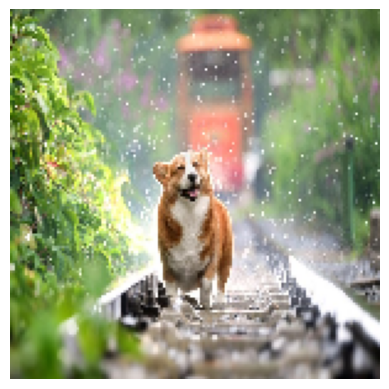

1/1 [==============================] - 0s 57ms/step
Predicted class: Dog


In [20]:
def predict_image_class(image_path, model):
    img = image.load_img(image_path, target_size=(150, 150))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image

    prediction = model.predict(img_array)
    if prediction[0] < 0.5:
        return 'Cat'
    else:
        return 'Dog'

# Example usage
image_path = '/content/drive/MyDrive/corgi-4415649_640.jpg'  # Replace with your image path
predicted_class = predict_image_class(image_path, model)
print("Predicted class:", predicted_class)